In [1]:
import pandas as pd

In [8]:
import re
import pandas as pd

def parse_log_file(log_file):
    """
    Parse a TensorFlow log file and extract the loss values into a DataFrame.
    
    Args:
        log_file (str): Path to the log file.
    
    Returns:
        pd.DataFrame: A DataFrame containing the loss values.
    """
    losses = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        i = 0
        while i < len(lines):
            line = lines[i]
            if 'INFO:tensorflow:Step' in line:
                step = int(re.findall(r'Step (\d+)', line)[0])           
                # Extract the loss values from the next few lines
                loss_lines = []
                while 'Loss/' in lines[i+2]:
                    loss_lines.append(lines[i+2])
                    i += 1
                loss_values = []
                for loss_line in loss_lines:
                    loss_values.extend(re.findall(r"'(.*?)': (\d+\.\d+)", loss_line))
                loss_dict = {key: float(value) for key, value in loss_values}
                loss_dict['step'] = step
                losses.append(loss_dict)
            i += 1
    
    return pd.DataFrame(losses)

In [13]:
import matplotlib.pyplot as plt

def plot_losses(df):
    """
    Plot the various loss values from the TensorFlow log file.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the loss values.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot the classification loss
    plt.subplot(221)
    plt.plot(df['step'], df['Loss/classification_loss'])
    plt.title('Classification Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    
    # Plot the localization loss
    plt.subplot(222)
    plt.plot(df['step'], df['Loss/localization_loss'])
    plt.title('Localization Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    
    # Plot the regularization loss
    plt.subplot(223)
    plt.plot(df['step'], df['Loss/regularization_loss'])
    plt.title('Regularization Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    
    # Plot the total loss
    plt.subplot(224)
    plt.plot(df['step'], df['Loss/total_loss'])
    plt.title('Total Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

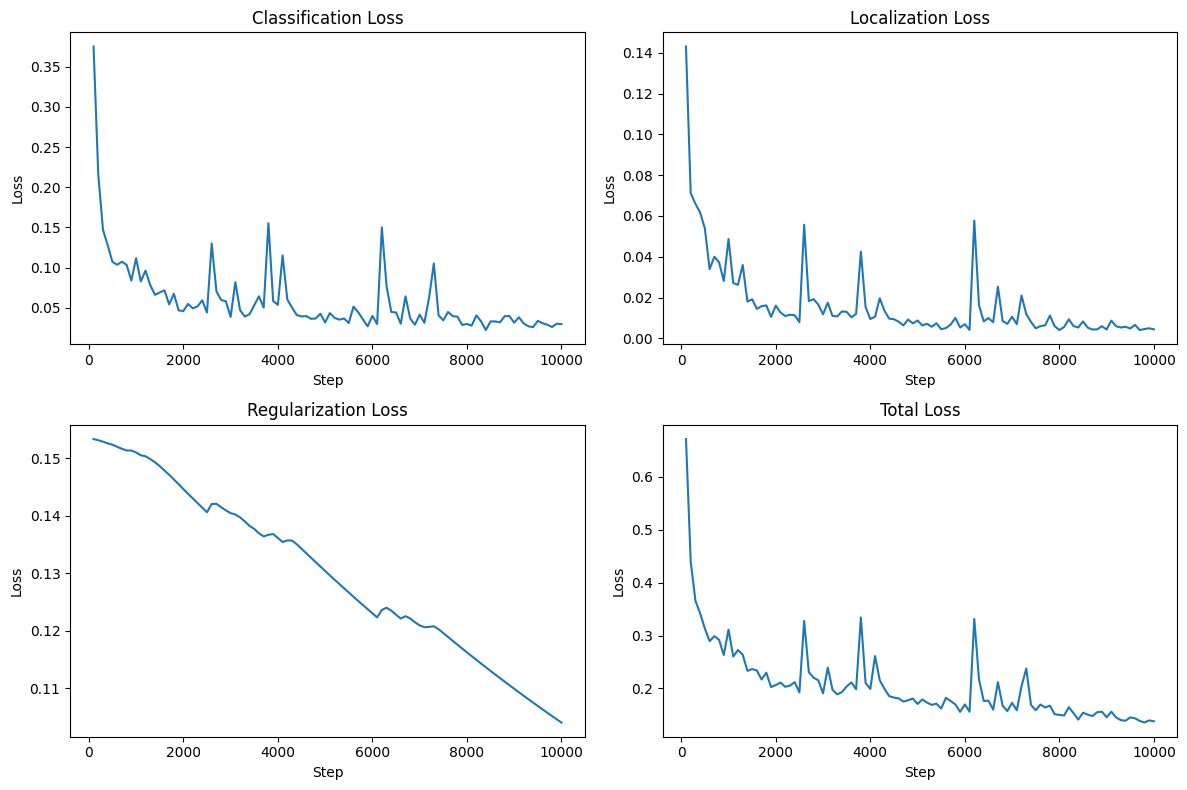

In [14]:
log_file = 'base_10000.log'
df = parse_log_file(log_file)
plot_losses(df)

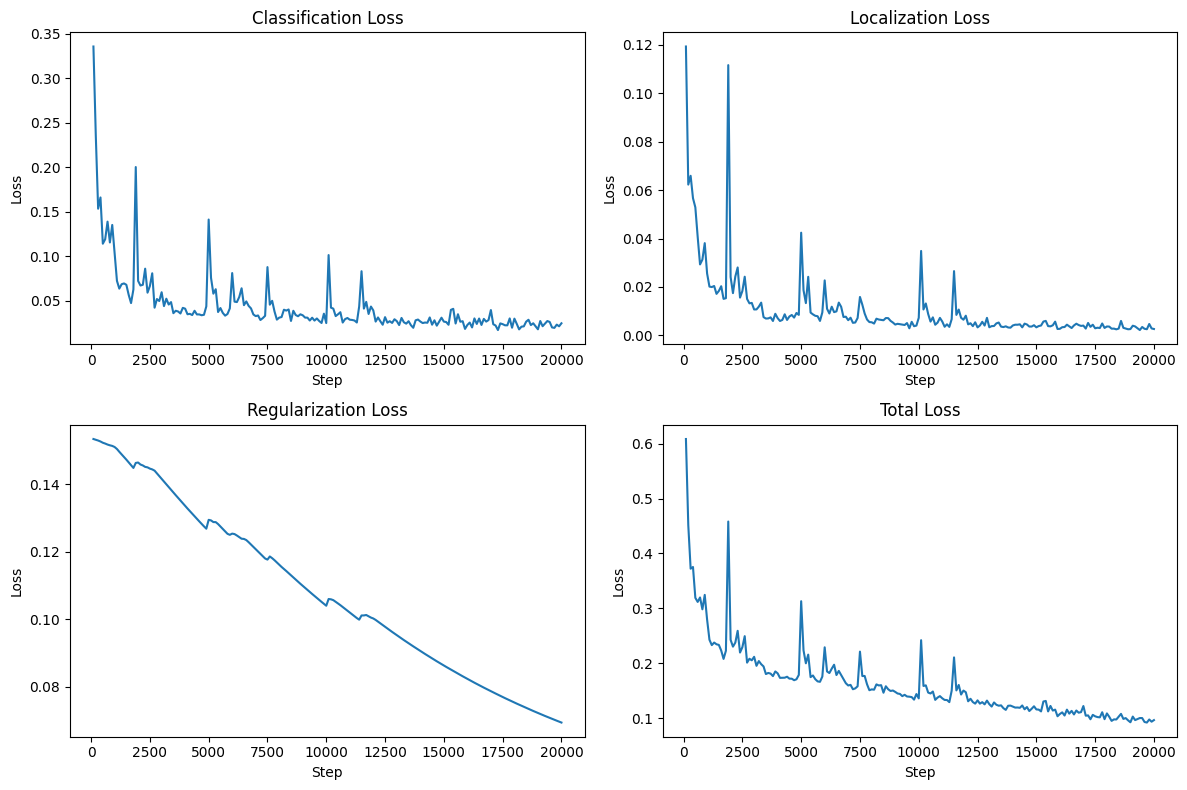

In [15]:
log_file = 'base_20000.log'
df = parse_log_file(log_file)
plot_losses(df)

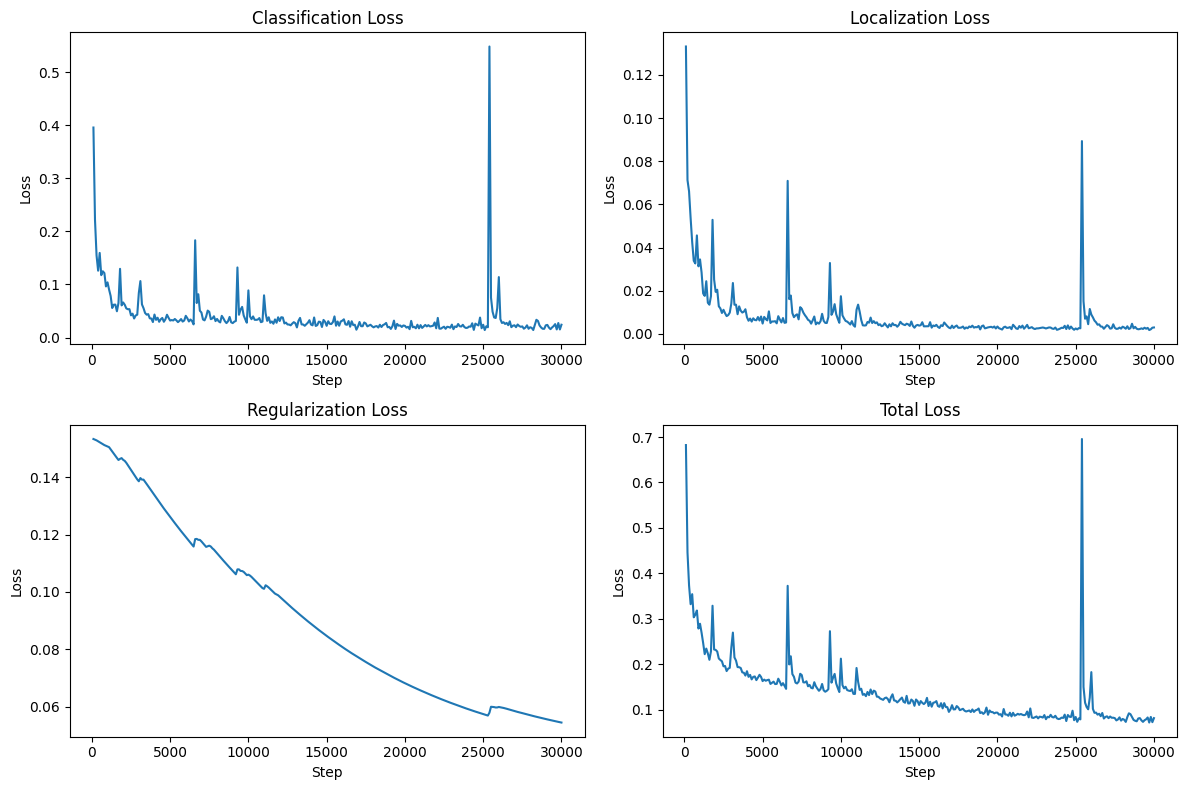

In [16]:
log_file = 'base_30000.log'
df = parse_log_file(log_file)
plot_losses(df)

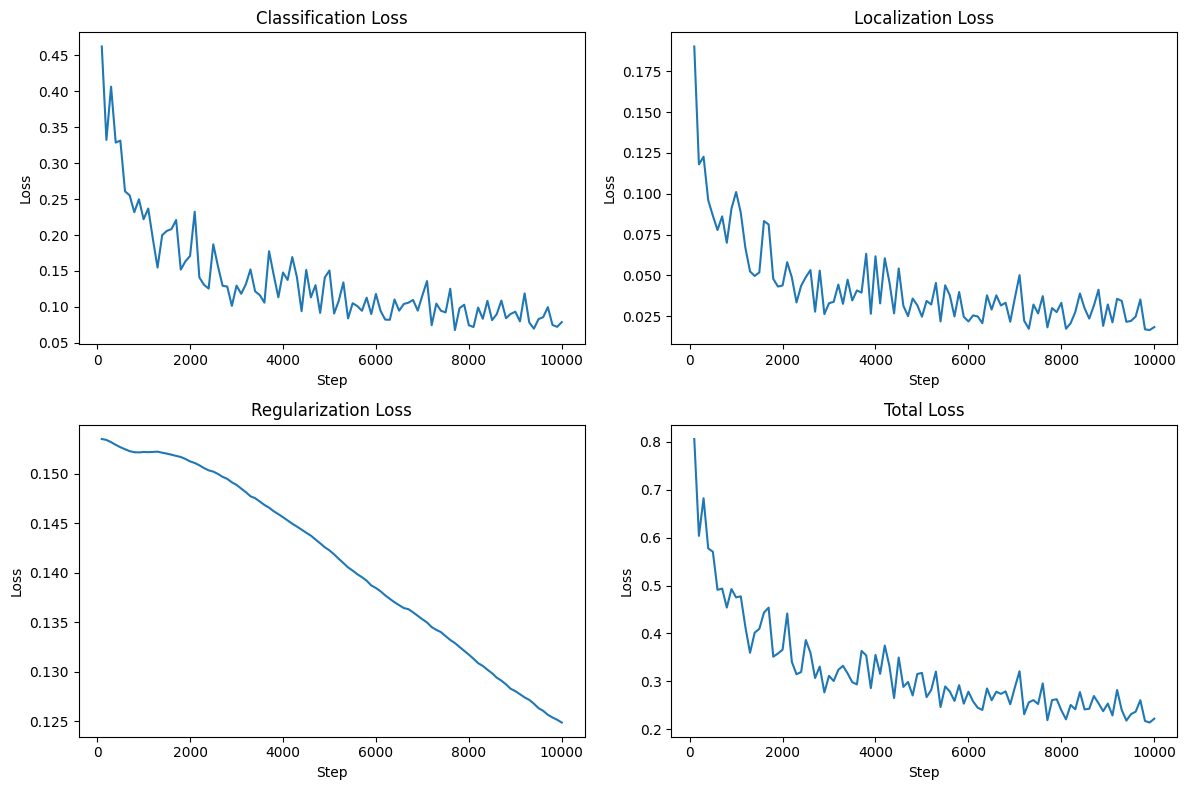

In [17]:
log_file = 'augment_10000.log'
df = parse_log_file(log_file)
plot_losses(df)